---
<a name='title'></a>
# **<font color="Navy"> Temas Selectos </font>**
## **<font color="RoyalBlue"> Tema 1.4 Programación científica en Python </font>**
### **<font color="DodgerBlue"> Notebook 3: Métodos numéricos </font>**
#### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---



## **Métodos numéricos**

Los métodos numéricos son un conjunto de algoritmos que en casi todos los casos usan una computadora para resolver problemas matemáticos planteados por la física, química, la biología o las ciencias de la Tierra. 

Se utilizan cuando el problema se vuelve demasiado laborioso para resolver a mano, o cuándo los problemas no son reales en estricto sentido. Por ejemplo, si uno obtiene un montón de datos de un dispositivo de medición que no siguen una forma analítica, o al menos no una forma analítica conocida.

> 1. Solución de sistemas de ecuaciones

Python y NumPy son herramientas fundamentales en la resolución de sistemas de ecuaciones lineales debido a su eficiencia, versatilidad y simplicidad. Python, como lenguaje de programación, proporciona una sintaxis clara y legible, facilitando la implementación de algoritmos matemáticos complejos. El objetivo de esta sección es resolver sistemas de ecuaciones utilizando NumPy que típicamente podríamos resolver con lápiz y papel para un número de variables y ecuaciones entre 2 y 4, pero ¿qué pasa si tenemos 10 o 14 ecuaciones? Para esto podemos utilizar una computadora, y en este caso Python, para aliviarnos la vida.

> 2. Integración numérica

 La integración numérica es crucial en situaciones donde no se puede obtener una solución analítica directa, y Python facilita la implementación de métodos numéricos para aproximar integrales definidas. NumPy ofrece funciones especializadas que simplifican la manipulación de datos y cálculos en el proceso de integración numérica. La capacidad de Python para manejar fácilmente funciones y su flexibilidad en la representación de ecuaciones hacen que sea una elección destacada para la implementación de algoritmos numéricos.

> 3. Diferencias finitas

Las diferencias finitas son una técnica matemática utilizada para aproximar soluciones a derivadas o ecuaciones diferenciales mediante la sustitución de derivadas por aproximaciones de diferencias que se calculan en intervalos finitos, en lugar de la definición formal que utiliza un continuo infinito de puntos. En esencia, implica discretizar el dominio continuo en una cuadrícula de puntos y aproximar las derivadas en esos puntos utilizando diferencias algebraicas y luego sumarlas.




In [1]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def grafico_linea_ts(xmin,xmax,xlab,ylab,title,ymin=None,ymax=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    # poner las labels de los ejes y el titulo
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    # checar si queremos leyenda, si sí, la ponemos y fancy
    if legend:
        plt.legend(fontsize=12.5,fancybox=True,shadow=True)

### Sistemas de ecuaciones lineales

La función `np.linalg.solve` en NumPy se utiliza para resolver sistemas de ecuaciones lineales representados en forma matricial. La función resuelve sistemas del tipo $Ax=B$, donde $A$ es una matriz de coeficientes, $x$ es el vector de incógnitas que queremos encontrar y $B$ es el vector de términos constantes.

La sintaxis básica de `np.linalg.solve` es la siguiente:

```
numpy.linalg.solve(a, b)
```

Donde:

  a: Es la matriz de coeficientes $A$.

  b: Es el vector de términos constantes $B$.

Por ejemplo, para el sistema de ecuaciones:

\begin{align}
3x+2y = 11 \\
2x-y =3
\end{align}

Podemos resolverlo a mano en clase (*el profe lo hace*) y obtiene $x=2$ y $y=1$.

In [3]:
# Definir el sistema de ecuaciones lineales en forma matricial (Ax = B)
A = np.array([[3, 2], [2, -1]])
B = np.array([11, 3])

# Utilizar la función solve de NumPy para encontrar la solución x
solucion = np.linalg.solve(A, B)

# Imprimir la solución
print("La solución del sistema de ecuaciones es:")
print("x =", int(solucion[0]))
print("y =", int(solucion[1]))

La solución del sistema de ecuaciones es:
x = 2
y = 1


Para un sistema un poquito más difícil:

\begin{align}
2x+y = 8 \\
x-3y = 1
\end{align}

Podemos resolverlo a mano y en Python:

---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 9 - Sistema de ecuaciones </font>**

<font color="DarkBlue"> Resolver el sistema de ecuaciones anterior (1) a mano y en NumPy e imprimir ambas soluciones mostrando que son iguales.

---



In [4]:
# Definir el sistema de ecuaciones lineales en forma matricial (Ax = B)
A = np.array([[2, 1], [1, -3]])
B = np.array([8, 1])

# Utilizar la función solve de NumPy para encontrar la solución x
solucion_numpy = np.linalg.solve(A, B)

# Imprimir la solución obtenida manualmente y la solución de NumPy
print("Solución manual:", [25/7,6/7])
print("Solución NumPy:", solucion_numpy)


Solución manual: [3.5714285714285716, 0.8571428571428571]
Solución NumPy: [3.57142857 0.85714286]


### Integración numérica

La integración numérica es esencial en Ciencias de la Tierra debido a la naturaleza frecuentemente compleja de los conjuntos de datos geofísicos y geoespaciales. En campos como la hidrología, la meteorología y la geofísica, se encuentran datos que representan fenómenos continuos y variaciones espacio-temporales. La capacidad de calcular áreas bajo curvas, volumen de terrenos, o flujos de datos a lo largo del tiempo, es crucial para entender y modelar fenómenos geofísicos. Python, con sus bibliotecas numéricas como *NumPy* y *SciPy*, proporciona herramientas poderosas para realizar integración numérica de manera eficiente y precisa. Estas técnicas permiten la $\textbf{aproximación}$ de integrales definidas y son fundamentales en la resolución de ecuaciones diferenciales que modelan fenómenos geofísicos complejos.

Una integral es una suma infinita de números por lo que una integral numérica es una aproximación de la suma infinita a través de una suma finita.

Regresemos a las clases de preparatoria donde la integral es el área bajo la curva. En particular,

\begin{align}
A=\int_a^b f(x)\, dx
\end{align}

es el área de la función $f(x)$ entre $a$ y $b$.

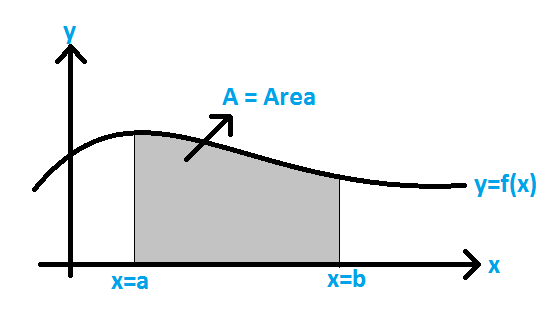

Uno de los métodos fundamentales de integración numérica es el método de los trapecios, que aproxima la integral definida dividiendo el área bajo una curva en múltiples trapecios y sumando sus áreas individuales.
Por ejemplo, para en la figura siguiente vemos de qué se trata este método y cómo se aproxima el área bajo la curva.

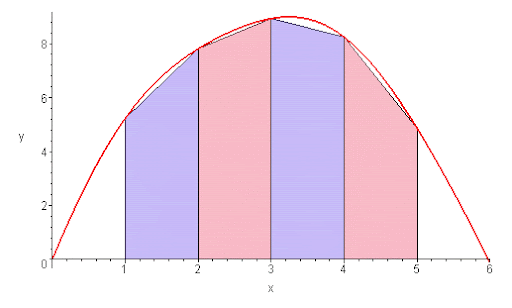

Vemos que si utilizamos un trapecio el espacio en blanco, donde nuestra aproximación falla, se vuelve más pequeño.


Como ejemplo, supongamos que queremos calcular la integral definida de la función $f(x)=x^2$ en el intervalo $[0,1]$. Podemos utilizar la regla del trapecio para este propósito y NumPy. El método de los trapecios es simple de entender y aplicar, especialmente para funciones continuas, y su implementación en *NumPy* es sencilla a través de la función `np.trapz` que toma como argumentos primero a $f(x)$ y luego al vector $x$.



In [5]:
# Definir la función a integrar
def f(x):
    return x**2

# Definir el intervalo de integración
a, b = -1, 1

# Generar puntos para la evaluación de la función
x_values = np.linspace(a, b, 1000)

# Calcular los valores de la función en esos puntos
y_values = f(x_values)

# Aplicar la regla del trapecio para la integración numérica, np.trapz(f(x),x)
integral_result = np.trapz(y_values, x=x_values)

# Imprimir el resultado
print("El resultado de la integración numérica es:", integral_result)

El resultado de la integración numérica es: 0.6666680026706719


Podemos integrar la función analíticamente y demostrar que

\begin{align}
\int_{-1}^1 f(x) dx=\int_{-1}^1 x^2 dx = \frac{x^3}{3}\bigg\rvert_{-1}^1 = \frac{2}{3}
\end{align}

lo cual coincide perfectamente con el resultado.

Pero, ¿qué fue lo que hicimos? El método de los trapecios aproxima la función a través de una línea entre cada vértica de los trapecios. Para esto, calcula la línea recta entre cada par de puntos $(a,b)$ de manera que la integral en cada intervalo se puede escribir como:

\begin{align}
\int_a^b f(x) dx \approx (b-a) \frac{f(a)+f(b)}{2}
\end{align}

Es decir, utiliza el valor de la función al principio y al final de cada trapecio para aproximar el valor del área bajo la curva. Si tuviéramos $n$ trapecios, entonces podemos sumar el valor del área de todos ellos y obtener un resultado más preciso, que depende de la *resolución* o número de trapecios. A mayor $n$, mejor será nuestra aproximación.

La fórmula de método de trapecios para $y=f(x)$ y $n$ trapecios es:

\begin{align}
\int_a^b f(x) dx \approx \frac{(b-a)}{n} \bigg[ \frac{y(a)+y(b)}{2} + \sum_{k=1}^n y(a +k \frac{b-a}{n}) \bigg]
\end{align}

donde $\sum_{k=1}^n y(a +k \frac{b-a}{n}) $ representa la suma de la función evaluada en cada vértice de los trapecios. Vamos a ver si graficando nos queda más claro.

Podemos, además, hacer nuestra propia función para calcular una integral con este método, que se puede escribir como:

In [6]:
# Método de trapecios manual para n trapecios
def trapecios(func, a, b, n):
    x = np.linspace(a, b, n + 1)
    # y = f(x)
    y = func(x)
    h = (b - a) / n
    resultado = h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    return x,y,resultado

Podemos utilizar esta función para mostrar qué fue lo que hicmos gráficamente en el ejemplo anterior:

Resultado aproximado con 6 trapecios
0.7037037037037037
Resultado de numpy trapz
0.6666680026706719


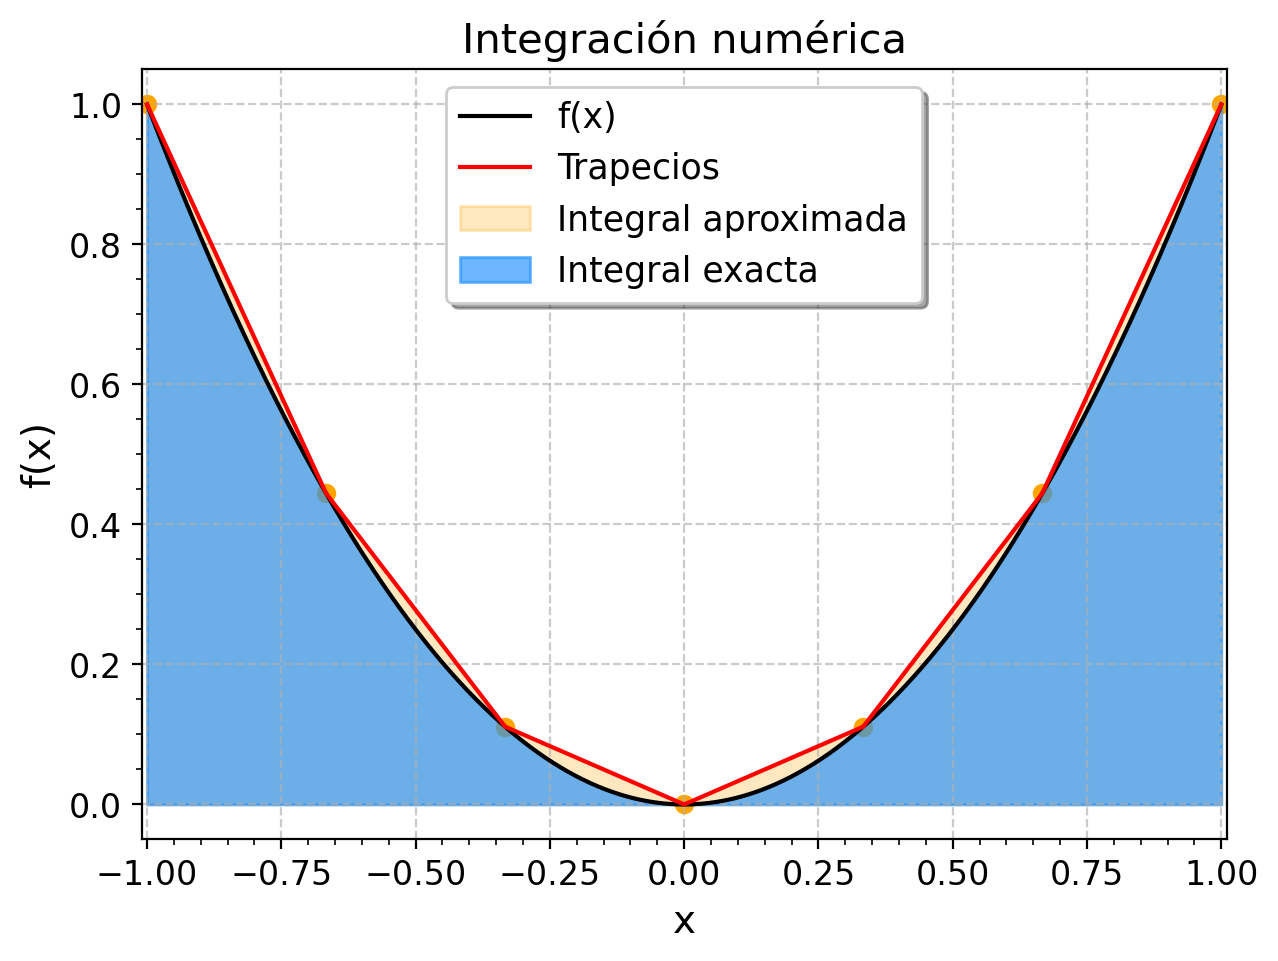

In [7]:
# Generar puntos para la evaluación de la función
x_values = np.linspace(a, b, 1000)

# Calcular los valores de la función en esos puntos
y_values = f(x_values)
xs,ys,resultado=trapecios(f,-1,1,6)
print('Resultado aproximado con 6 trapecios')
print(resultado)
print('Resultado de numpy trapz')
print(np.trapz(y_values,x_values))

plt.figure(figsize=(7,5),dpi=200)
plt.plot(x_values,y_values,c='k',label='f(x)')
plt.plot(xs,ys,c='red',label='Trapecios')
plt.scatter(xs,ys,c='orange')
plt.fill_between(xs,ys,color='orange',alpha=0.25,label='Integral aproximada')
plt.fill_between(x_values,y_values,color='dodgerblue',alpha=0.65,label='Integral exacta')
grafico_linea_ts(-1.01,1.01,'x','f(x)','Integración numérica',legend=True)

Resultado aproximado con 10 trapecios
-3.885780586188048e-17
Resultado de numpy trapz
0.6666680026706719


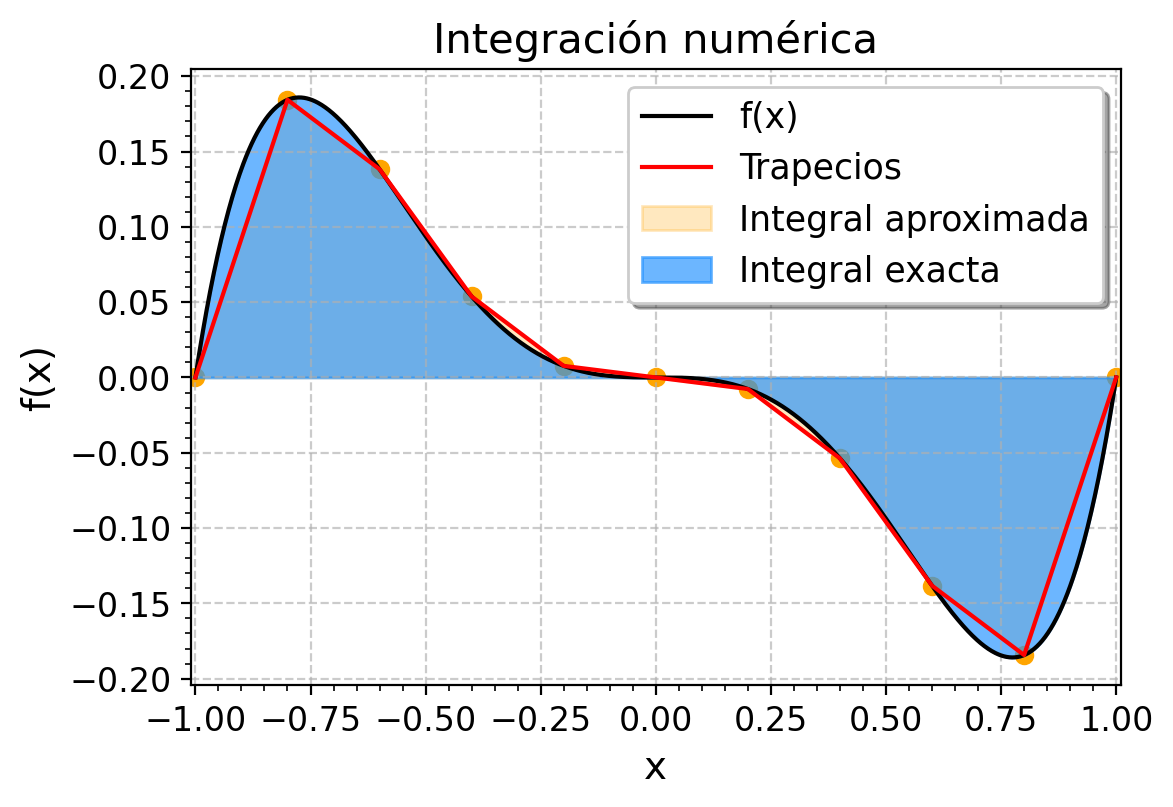

In [8]:
def f(x):
    return x**5-x**3
xs,ys,resultado=trapecios(f,-1,1,10)
print('Resultado aproximado con 10 trapecios')
print(resultado)

print('Resultado de numpy trapz')
print(np.trapz(y_values,x_values))


# Generar puntos para la evaluación de la función
x_values = np.linspace(a, b, 1000)

# Calcular los valores de la función en esos puntos
y_values = f(x_values)

plt.figure(figsize=(6,4),dpi=200)
plt.plot(x_values,y_values,c='k',label='f(x)')
plt.plot(xs,ys,c='red',label='Trapecios')
plt.scatter(xs,ys,c='orange')
plt.fill_between(xs,ys,color='orange',alpha=0.25,label='Integral aproximada')
plt.fill_between(x_values,y_values,color='dodgerblue',alpha=0.65,label='Integral exacta')
grafico_linea_ts(-1.01,1.01,'x','f(x)','Integración numérica',legend=True)

---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 10 - Integración </font>**

<font color="DarkBlue"> 1. Repita el ejercicio anterior pero utilizando el método de trapecios con 25 intervalos o 25 trapecios, muestre la gráfica y además imprima el valor exacto de la diferencia entre el resultado de la función de numpy y el resultado del método manual.

<font color="DarkBlue"> 2. Integre numéricamente la función $f(x)=x^3-2x^2+1$ utilizando el método de trapecios con la función de NumPy y la función explícita que escribimos abajo para $n=$5, 15 y 25 en el intervalo $[-2,2]$.

---


## Introducción a la Modelación Numérica


Una ecuación diferencial es una ecuación que nos dice la tasa de cambio infinitesimal de una función desconocida, por ejemplo, $f(y)$, para cada cambio infinitesimal de $x$. En otras palabaras, involucra una función desconocida y una o más de sus derivadas. 

Existen dos tipos principales de ecuaciones diferenciales:

1. **Ecuaciones Diferenciales Ordinarias (ODEs)**: Estas ecuaciones involucran una función desconocida de una variable independiente. Es una ecuación que involucra la derivada de una función que es la queremos encontrar y que sólo tiene una variable independiente. 

    Por ejemplo, $ \frac{{dy}}{{dx}} = f(x) $ es una ecuación diferencial ordinaria, donde $y$ es la función desconocida de $x$.  Resolver esta ecuación, en este contexto, quiere decir encontrar todas las funciones posibles que satisfagan la ecuación diferencial. 
    
    Un método para resolver esta ecuación es el método de separación de variables que consiste en separar los términos de $y$ y $x$ a ambos lados de la ecuación. 
    
    \begin{align}
     \frac{dy}{dx}=xy
    \end{align}

    ** profe la resuelve por separación de variables en el pizarrón. Además explica las condiciones de frontera versus las condiciones iniciales.

    \begin{align}
     \frac{dy}{y}=x dx
    \end{align}

    \begin{align}
     \int \frac{dy}{y}= \int x dx
    \end{align}

    Y para las condiciones iniciales $y(x_0=0)=0$ y $y(x)=y$ se resuelve como:

    \begin{align}
     y(x)= e^{x^2}-1 
    \end{align}
    
    
2. **Ecuaciones en Derivadas Parciales (PDEs)**: Estas ecuaciones involucran una función desconocida de varias variables independientes y sus derivadas parciales. Por ejemplo, la ecuación de difusión $ \frac{{\partial u}}{{\partial t}} = D \frac{{\partial^2 u}}{{\partial x^2}} $ es una ecuación en derivadas parciales, donde $u(x, t)$ es la función desconocida.

Los métodos numéricos se utilizan para resolver ecuaciones diferenciales cuando no es posible encontrar una solución analítica (es decir, una expresión algebraica que representa la solución exacta). Esto puede deberse a la complejidad de la ecuación, la falta de métodos analíticos disponibles o la necesidad de encontrar soluciones en casos generales o específicos.

Modelos famosos como el _modelo depredador-presa_ y el _modelo de clima de Lorenz_ son algunos ejemplos de modelos con ecuaciones diferenciales que fueron cruciales en nuestra comprensión de fenómenos estudiados por los científicos de la Tierra. En este contexto, los métodos numéricos son esenciales para resolver ecuaciones diferenciales que gobiernan estos procesos complejos, permitiendo a los científicos simular y predecir el comportamiento de la Tierra y sus sistemas ambientales en diferentes escalas espaciales y temporales. Estas simulaciones numéricas proporcionan información crucial para abordar desafíos ambientales, como el cambio climático, la gestión de recursos naturales y la mitigación de riesgos naturales, lo que contribuye a una comprensión más profunda y holística de nuestro planeta y su entorno dinámico.

Algunas razones por las que se utilizan métodos numéricos para resolver ecuaciones diferenciales incluyen:

1. **Flexibilidad**: Los métodos numéricos pueden adaptarse para resolver una amplia variedad de ecuaciones diferenciales, incluidas aquellas para las cuales no existen soluciones analíticas conocidas.

2. **Eficiencia computacional**: Algoritmos numéricos eficientes pueden calcular soluciones aproximadas en un tiempo razonable, incluso para problemas complejos o con dimensiones altas.

3. **Precisión controlada**: La precisión de la solución numérica puede controlarse ajustando el tamaño de los pasos de integración o la precisión de la aproximación.

4. **Aplicabilidad a problemas reales**: Muchos problemas del mundo real, especialmente en ciencias de la ingeniería y la física, pueden modelarse mediante ecuaciones diferenciales. Los métodos numéricos permiten resolver estos modelos para obtener información práctica.



### Diferencias finitas

Dos conceptos clave cuando queremos resolver una ecuación diferencial es 

- Discretización: El dominio continuo sobre el cual está definida la ecuación diferencial se discretiza en una cuadrícula de puntos. Esta cuadrícula puede ser unidimensional, bidimensional o tridimensional, dependiendo de la naturaleza del problema.

- Aproximación de Derivadas: En lugar de calcular derivadas analíticamente, los métodos de diferencias finitas aproximan las derivadas utilizando los valores de la función en los puntos vecinos de la cuadrícula. Existen diferentes esquemas de diferencias finitas para aproximar derivadas de primer orden, segundo orden y de orden superior.


#### El método de diferencias finitas 

Este método aproxima una derivada a través de evaluar una función en pequeños pedazos discretos separados por un intervalo $h$.

\begin{align}
f'(x_0)\approx \frac{f(x_0+h)-f(x_o)}{h}
\end{align}


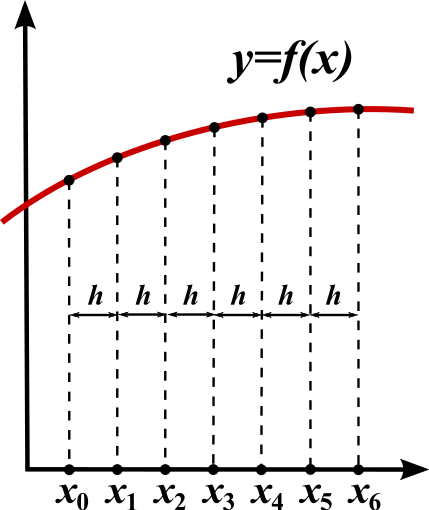

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

#### **<font color="IndianRed">Calcular la derivada de la función $f(x)=x^2$ utilizando el método de diferencias finitas, para $x_0=1$ y $h_0=0.1$. Compárelo con el resultado analítico. </font>** 
---

In [9]:
def f(x):
    return x**2
x_0=1
h=0.1
f_prima=(f(x_0+h)-f(x_0))/h
print(f_prima)

2.100000000000002


---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 11 - Diferencias finitas </font>**

<font color="DarkBlue"> 1. Calcule la derivada de  $f(x)=x^3$ y grafique su función analítica en el intervalo [-3,3].
    
<font color="DarkBlue"> 2. Calcule la derivada de la misma función utilizando el método de diferencias finitas en el mismo intervalo para $h=0.1$ y $h=0.5$ y agréguelas a la gráfica anterior. ¿Son buenas aproximaciones? ¿Importa el factor $h$?
    
---


### **<font color="ForestGreen">  El gradiente </font>**

Otra variable importante que nos podría interesar es el gradiente de una función. Podemos calcular gradientes o derivadas en 1D con la función `np.gradient`. 

`np.gradient` es una función de NumPy que se utiliza para calcular el gradiente de un conjunto de datos multidimensional. El gradiente es un vector que indica la dirección y la magnitud del cambio máximo en un campo escalar. En el contexto de la temperatura, calcular el gradiente nos permite determinar cómo varía la temperatura en diferentes direcciones dentro de un dominio.

Aquí hay un ejemplo que ilustra cómo usar `np.gradient` con un campo de temperatura representado como una matriz bidimensional:

Supongamos que tenemos una matriz que representa un campo de temperatura, donde cada celda de la matriz contiene la temperatura en un punto específico del dominio. Queremos calcular el gradiente de temperatura en cada punto del dominio para entender cómo varía la temperatura en diferentes direcciones.


In [35]:
# Creamos un campo de temperatura de ejemplo (matriz 2D)
temperatura = np.array([
    [20, 22, 24, 26],
    [21, 30, 25, 27],
    [24, 28, 30, 28],
    [29, 25, 27, 29]
])
print('Arreglo')
print(temperatura)
print('Forma',temperatura.shape)

# Calculamos el gradiente de temperatura en las direcciones x e y
gradiente_x, gradiente_y = np.gradient(temperatura)

# Mostramos los resultados
print("Gradiente en la dirección x:")
print(gradiente_x)

print("\nGradiente en la dirección y:")
print(gradiente_y)

Arreglo
[[20 22 24 26]
 [21 30 25 27]
 [24 28 30 28]
 [29 25 27 29]]
Forma (4, 4)
Gradiente en la dirección x:
[[ 1.   8.   1.   1. ]
 [ 2.   3.   3.   1. ]
 [ 4.  -2.5  1.   1. ]
 [ 5.  -3.  -3.   1. ]]

Gradiente en la dirección y:
[[ 2.   2.   2.   2. ]
 [ 9.   2.  -1.5  2. ]
 [ 4.   3.   0.  -2. ]
 [-4.  -1.   2.   2. ]]


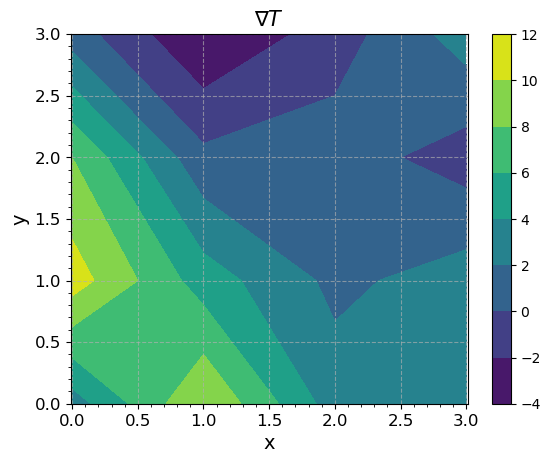

In [36]:
gradiente_total=gradiente_y+gradiente_x
plt.contourf(gradiente_total)
plt.colorbar()
grafico_linea_ts(-0.01,3.01,'x','y',r'$\nabla T$')

Esta función ocupa un método conocido como "diferencias finitas centradas". Para entender un poco más cómo funciona o qué significa esto vamos a ver el tema de diferencias finitas. 

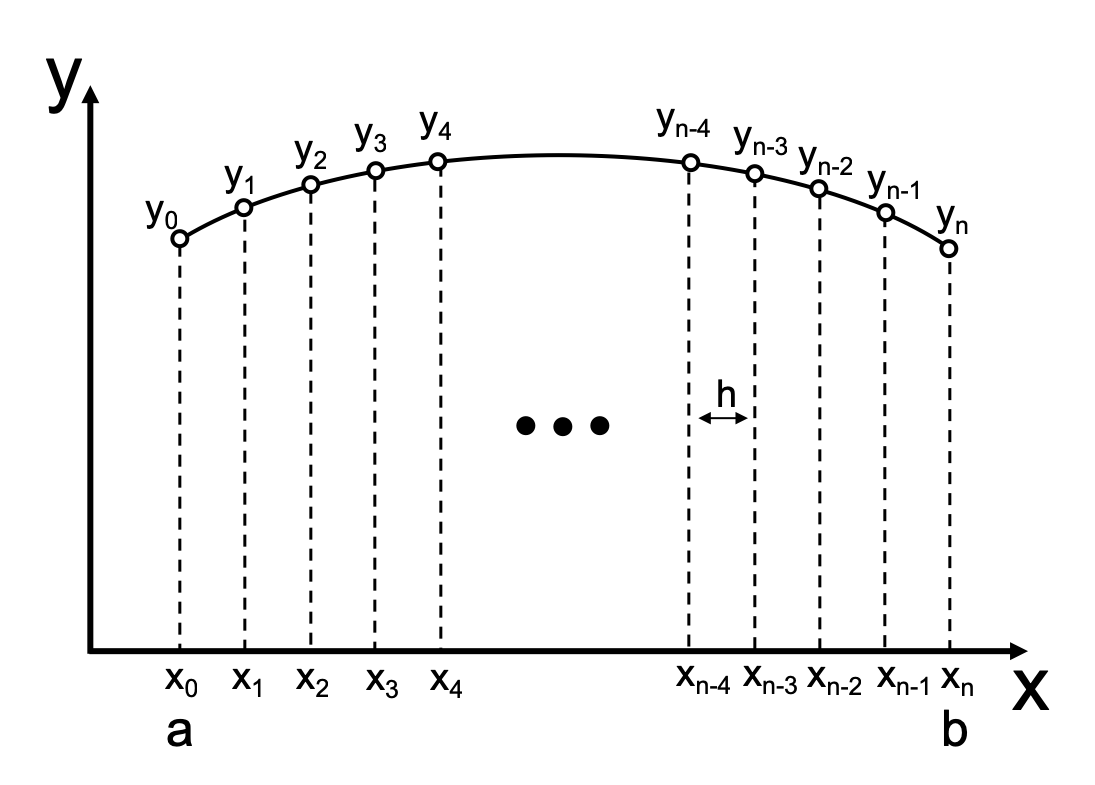

Para resolver una ODE con diferencias finitas existen 3 formas principales. 

- Diferencias hacia adelante: calculamos la ecuación diferencial moviéndonos en el eje x hacia adelante en cada paso. 

\begin{align}
\frac{dy}{dx}=\frac{y_{i+1}-y_i}{h}
\end{align}

- Diferencias hacia atrás: calculamos la ecuación diferencial moviéndonos en el eje x hacia atrás en cada paso. 

\begin{align}
\frac{dy}{dx}=\frac{y_i-y_{i-1}}{h}
\end{align}

- Diferencias centradas: calculamos la ecuación diferencial moviéndonos en el eje x pero evaluando la función adelante y atrás. 

\begin{align}
\frac{dy}{dx}=\frac{y_{i+1}-y_{i-1}}{h}
\end{align}

---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

---

Ahora resolveremos la ecuación de primer orden:
\begin{align}
\frac{dy}{dt}=−ky
\end{align}

donde $y$ es una función de $t$ y $k$ es una constante.

Este es un ejemplo básico de una ecuación diferencial ordinaria que describe la tasa de cambio de una variable $y$ en función del tiempo $t$.
    
Pero para poder entenderla, es útil pensar en dos ecuaciones diferenciales:
 
 \begin{align}
         \frac{dy}{dt}=t
 \end{align}

 \begin{align}
     \frac{dy}{dt}=y
 \end{align}
 
 ¿Cuál es la diferencia entre estas dos ecuaciones?
 
La diferencia entre las ecuaciones $ \frac{dy}{dt}=t$ $\frac{dy}{dt}=y$ radica en cómo se comporta la variable dependiente $y$ en relación con la variable independiente $t$.

- $ \frac{dy}{dt}=t$ :Esta ecuación implica que la tasa de cambio de $y$ con respecto al tiempo $t$ es igual a la variable independiente $t$ en sí misma.
        
    La solución de esta ecuación diferencial ordinaria (ODE) sería una función de la forma $y(t)=\frac{t^2}{2}+C$, donde $C$ es una constante de integración.

    En otras palabras, la tasa a la que $y$ cambia está determinada por la función lineal $t$.
        
        

- $\frac{dy}{dt}=y$ : En esta ecuación, la tasa de cambio de $y$ con respecto al tiempo $t$ es proporcional a $y$ mismo.
        
    La solución de esta ecuación diferencial ordinaria (ODE) es una función exponencial, $y(t)=Ce^{t}$, donde $C$ es una constante de integración.
    
    Aquí, la tasa de cambio de $y$ en cualquier momento $t$ es proporcional a $y$ en ese momento.

En resumen, la principal diferencia radica en cómo se relaciona la tasa de cambio de la variable dependiente $y$ con la variable independiente $t$ en cada ecuación. En el primer caso, la tasa de cambio depende linealmente de $t$, mientras que en el segundo caso, la tasa de cambio es proporcional a $y$ mismo.

En todos estos casos, vemos problemas de valores de condición inicial. Es decir, necesitamos saber cuál es el valor de la función en algún punto. 

Para resolver esta ecuación diferencial con el método de diferencias finitas utilizamos el método de diferencias finitas hacia adelante:

\begin{align}
\frac{dy}{dx}=\frac{y_{i+1}-y_i}{h}
\end{align}

Sustituyendo este método en nuestra ecuación diferencial tenemos: 


\begin{align}
\frac{dy}{dt}=−ky = \frac{y_{i+1}-y_i}{h}
\end{align}

y despejando $y_i$ podemos ir calculando cada valor de la función progresivamente:

\begin{align}
y_{i+1} = y_i - k\, h \, y_i
\end{align}

Para resolver esto, necesitamos parámetros para resolver nuestra ecuación diferencial, condiciones frontera y parámetros para nuestra solución numérica. 

Estos son 

- $k$, es una constante en nuestra ecuación diferencial, que tomaremos como 0.1
- $h$, paso temporal, que definiremos en función de por cuánto tiempo resolveremos nuestra ecuación diferencial y cuántos puntos utilizaremos para resolver la ecuación. 
$h=T/N_t$ donde $T$ es el tiempo total, por ejemplo 10 segundos, mientras que $N_t$ es el tamaño de paso temporal. 
- $y_0$ condición inicial de $y$, en este caso $y(0)=1$. 



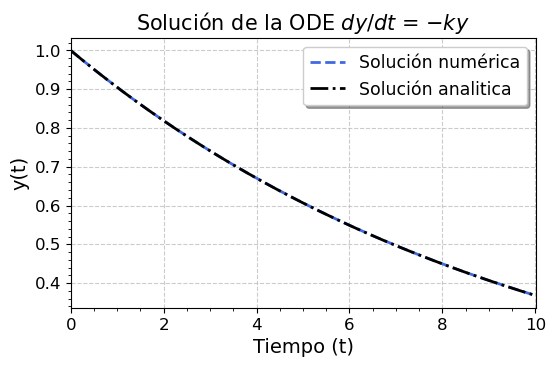

In [10]:
# Parámetros
k = 0.1  # Constante de proporcionalidad
T = 10.0  # Tiempo total
Nt = 1000  # Número de pasos de tiempo
h = T / Nt  # Tamaño del paso temporal

# Condiciones iniciales
y0 = 1.0  # Valor inicial de y
t_values = np.linspace(0, T, Nt)
y_values = np.zeros(Nt)
y_values[0] = y0

# Esquema de diferencias finitas para ODE
for n in range(Nt - 1):
    y_values[n + 1] = y_values[n] + h * (-k * y_values[n])

y_analitica= y0*np.exp(-k*t_values)
# Visualización de la solución
plt.figure(figsize=(6,3.5))
plt.plot(t_values, y_values, c='royalblue',linewidth=2,linestyle='--',label='Solución numérica')
plt.plot(t_values, y_analitica, c='k',linewidth=2,linestyle='-.',label='Solución analitica')
grafico_linea_ts(0,10.01,'Tiempo (t)','y(t)','Solución de la ODE $dy/dt$ = $-ky$',legend=True)


En esta solución vemos que la aproximación numérica es indistinguible de la solución analítica, que es justo el objetivo de lo que queríamos con esta aproximación numérica. 

¿Podremos obtener igual de buenos resultados con otras ecuaciones?


---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 12 - Ec. diferencial 1 </font>**

<font color="DarkBlue"> 1. Resuelva la ecuación diferencial  \begin{align}
     \frac{dy}{dt}=y
 \end{align} con condición inicial $y(0)=0.1$ utilizando el método de separación de variables (analítico) y luego el de diferencias finitas (numérico). 

<font color="DarkBlue"> 2. Grafique ambas soluciones en intervalo [0,1].

---


## El modelo Lotka-Volterra

El sistema de ecuaciones de Lotka-Volterra es un conjunto de ecuaciones diferenciales utilizadas para modelar la dinámica de las poblaciones de depredadores y presas en un ecosistema. Este modelo fue propuesto de forma independiente por Alfred J. Lotka y Vito Volterra en la década de 1920. Ambos científicos partían de la hipótesis de un sistema con dos poblaciones podría tener números oscilatorios como producto de la dinámica entre ellas.

El sistema de ecuaciones diferenciales de Lotka-Volterra se compone de dos ecuaciones diferenciales, una para la población de la presa y otra para la población del depredador que se pueden escribir de la siguiente forma:

- Para la población de la presa (usualmente denotada como $x$):
    
    \begin{align}
    \frac{dx}{dt}=\alpha x−\beta\,xy
   \end{align}

- Para la población del depredador (usualmente denotada como $y$):
    
     \begin{align}
        \frac{dy}{dt}=−\gamma y+\delta xy
     \end{align}
 
Cada término y parámetro en estas ecuaciones se puede describir de la siguiente forma:

- $x$: Representa la población de la presa, como por ejemplo, conejos, peces, etc.

- $y$: Representa la población del depredador, como por ejemplo, lobos, tiburones, etc.

- $\frac{dx}{dt}$: Esta expresión denota la tasa de cambio de la población de presa en función del tiempo. Es decir, representa cómo cambia la población de presa con el tiempo.

- $\frac{dy}{dt}$: Esta expresión denota la tasa de cambio de la población del depredador en función del tiempo. Es decir, representa cómo cambia la población del depredador con el tiempo.

- $\alpha$: Tasa de crecimiento intrínseca de la población de presa en ausencia de depredadores. Es el crecimiento máximo de la población de presa cuando no hay depredadores.

- $\beta$: Tasa de mortalidad de la presa debido a la depredación. Es la tasa a la que los depredadores matan a las presas.

- $\gamma$: Tasa de disminución de la población de depredadores en ausencia de presas. Es la tasa de decrecimiento de la población del depredador cuando no hay presas disponibles.

- $\delta$: Eficiencia en la conversión de presas en nuevos depredadores. Representa la eficacia con la que los depredadores convierten las presas en nuevos depredadores. O la eficacia con la que son cazadas las presas.

Interpretación:

   * La primera ecuación describe cómo la población de presas crece a una tasa proporcional a su propia población ($\alpha x$) pero disminuye a una tasa proporcional al número de depredadores ($\beta y$). Esto significa que a medida que aumenta la población de presas, la tasa de crecimiento de las presas se incrementa pero la tasa de depredación sobre las presas también aumenta.
   
   * La segunda ecuación describe cómo la población de depredadores disminuye a una tasa proporcional a su propia población ($−\gamma y$), pero aumenta a una tasa proporcional al número de presas ($\delta x\,y$). Esto significa que la población de depredadores disminuye cuando no tienen suficientes presas para cazar, pero aumenta cuando hay presas disponibles.

Estas ecuaciones capturan la dinámica básica de cómo las interacciones entre depredadores y presas influyen en las poblaciones de ambos en un ecosistema. Sin embargo, es importante destacar que el modelo Lotka-Volterra es muy simplista y no tiene en cuenta factores como la competencia, la variabilidad ambiental y otras interacciones ecológicas que pueden influir en las poblaciones en un ecosistema real.





---
<a name='ej-1'></a>
### **<font color="OrangeRed">Ejemplo </font>**

<font color="IndianRed">En la siguiente celda, vamos a resolver el modelo Lotka-Volterra para un total de 80 saltos de tiempo. 
    
<font color="IndianRed"> Las condiciones iniciales será de $x_0=10$ y $y_0=5$. Además, vamos a utilizar ciertos parámetros para los coeficientes de las ecuaciones que funcionan relativamente bien. 
    
<font color="IndianRed"> Vamos a resolver el modelo utilizando dos métodos diferentes de solución. Uno es diferencias finitas, que ya vimos, y otro es llamado Runge-Kutta por quiénes lo desarrollaron.  Por ahora, será suficiente decir que el método de Runge-Kutta es un método mejor para calcular las soluciones a estas ecuaciones, y en un momento vemos por qué. 
    
---


In [37]:
# Definición de las ecuaciones diferenciales del modelo Lotka-Volterra
def lotka_volterra(t, state, alpha, beta, gamma, delta):
    x, y = state
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return np.array([dxdt, dydt])

def diferencia_finita(x0,y0,N,dt,alpha,beta,gamma,delta):
    

    # metodo de diferencias finitas
    x_values = np.zeros(N)
    y_values = np.zeros(N)
    # Condiciones iniciales
    x_values[0] = x0
    y_values[0] = y0
    # Método de diferencias finitas hacia adelante
    for i in range(N-1):
        state=x_values[i],y_values[i]
        solution=lotka_volterra(i,state,alpha,beta,gamma,delta)

        x_values[i+1] = x_values[i] + dt *solution[0]
        y_values[i+1] = y_values[i] + dt *solution[1]
    return np.asarray(x_values),np.asarray(y_values)

# Método de Runge-Kutta de cuarto orden (RK4)
def runge_kutta4(t, y, h, alpha, beta, gamma, delta):
    k1 = h * lotka_volterra(t, y, alpha, beta, gamma, delta)
    k2 = h * lotka_volterra(t + 0.5 * h, y + 0.5 * k1, alpha, beta, gamma, delta)
    k3 = h * lotka_volterra(t + 0.5 * h, y + 0.5 * k2, alpha, beta, gamma, delta)
    k4 = h * lotka_volterra(t + h, y + k3, alpha, beta, gamma, delta)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6




En la siguiente celda definismos los parametros del modelo y lo resolvemos utilizando nuestra función de diferencias finitas. 

In [90]:
# Parámetros del modelo
alpha = 1.0
beta = 0.1
gamma = 1.5
delta = 0.075

# tiempo final
tiempof = 80

# salto de tiempo 
dt=0.005
# Condiciones iniciales y configuración del tiempo
x0,y0 = 10, 5  # Poblaciones iniciales de presa y depredador
t = np.arange(0, tiempof, dt)  # Vector de tiempo
# numero de puntos a resolver
N=int(tiempof/dt)

# evaluamos la solucion con nuestra funcion de diferencia finita
solucion=diferencia_finita(x0,y0,N,dt,alpha,beta,gamma,delta)

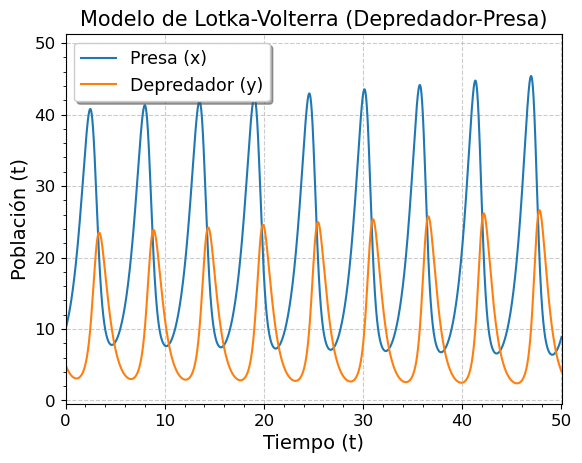

In [91]:
# Visualización de la solución
plt.plot(t, solucion[0], label='Presa (x)')
plt.plot(t, solucion[1], label='Depredador (y)')
grafico_linea_ts(0,50.01,'Tiempo (t)','Población (t)','Modelo de Lotka-Volterra (Depredador-Presa)',legend=True)


Ahora por el método de Runge Kutta que requiere una solución ligeramente diferente. 

In [97]:
# Método de Runge-Kutta
# definimos condiciones iniciales y0=(presa0,depredador0)
y0 = [10, 5]
# iniciamos lista de solución
solution=[y0]
# espaciado de tiempo 
dt=0.1
# vector de tiempo de RK
trk = np.arange(0, tiempof, dt) 
# solucion iterativa de runge-kutta 
for i in range(len(trk) - 1):
    # la siguiente solucion depende del punto tiempo en el que estoy, 
    # la ultima solucion o la solucion anterior solution[-1]
    y_next = runge_kutta4(trk[i], solution[-1],dt, alpha, beta, gamma, delta)
    solution.append(y_next)
# la solucion de runge kutta es un arreglo de 2 dimensiones con presas y depredadores en cada una
solution = np.array(solution)

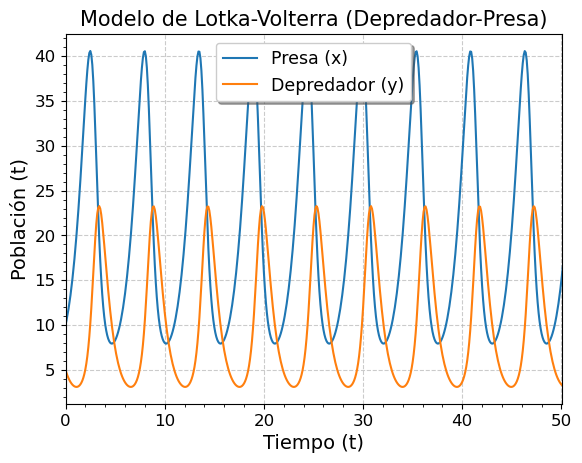

In [98]:
# Visualización de la solución
plt.plot(trk, solution[:,0], label='Presa (x)')
plt.plot(trk, solution[:,1], label='Depredador (y)')
grafico_linea_ts(0,50.01,'Tiempo (t)','Población (t)','Modelo de Lotka-Volterra (Depredador-Presa)',legend=True)


Aunque no se nota claramente, existen diferencias en las soluciones, a pesar de que ambas representan soluciones al mismo modelo. 

Podemos graficar ambas soluciones para la población de las presas solamenta (¨Presas¨) como función del tiempo y apreciar mejor las diferencias. 


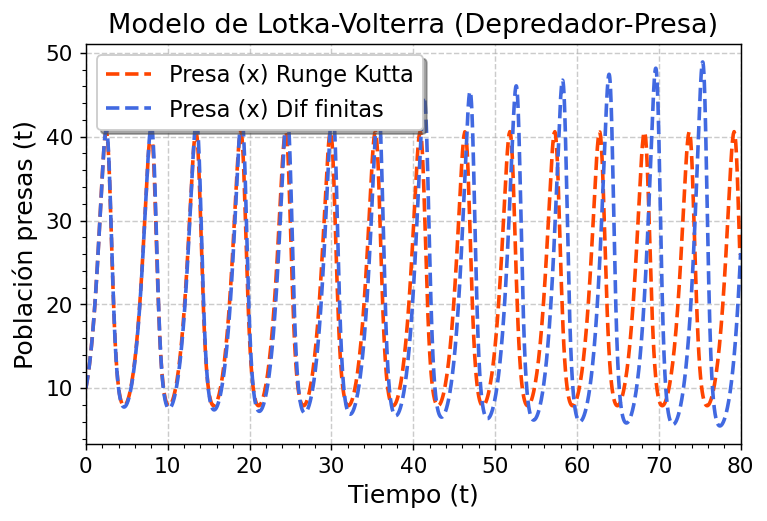

In [99]:
# Visualización de la solución
plt.figure(figsize=(6.5,4),dpi=130)
plt.plot(trk, solution[:,0], label='Presa (x) Runge Kutta',linestyle='--',c='orangered',linewidth=2)
plt.plot(t, solucion[0], label='Presa (x) Dif finitas',linestyle='--',c='royalblue',linewidth=2)
grafico_linea_ts(0,80.01,'Tiempo (t)','Población presas (t)','Modelo de Lotka-Volterra (Depredador-Presa)',legend=True)


En la comparación anterior, vemos que la solución de Diferencias finitas empieza a salirse del equilibrio entre las dos poblaciones. Ambas poblaciones empiezan a fluctuar. Esto es indicativo de que nuestra solución es **inestable** y queremos que no lo sea. 

La solución por el método de Runge-Kutta, que quién sabe cómo sea, parece ser mejor. Por lo menos es estable, incluso si estamos utilizando un espaciado mayor al de diferencias finitas. 

### **<font color="ForestGreen">  El método de Runge-Kutta </font>**

El método de Runge-Kutta es una técnica numérica utilizada para resolver ecuaciones diferenciales ordinarias (EDO) de manera aproximada. Este método es ampliamente utilizado debido a su precisión y estabilidad. Hay diferentes tipos de métodos de Runge-Kutta, siendo los más comunes el método de segundo orden (RK2), el método de cuarto orden (RK4) y el método de cuarto orden con control de paso (RK45).

- Método de segundo orden (RK2):

El método de segundo orden de Runge-Kutta utiliza la siguiente fórmula para aproximar la solución de una EDO:

\begin{align}
y_{n+1}=y_n+h k_2
\end{align}

donde $y_{n+1}$ es el valor aproximado de la solución en el siguiente paso, $y_n$ es el valor de la solución en el paso actual, $h$ es el tamaño del paso y $k_2$ es la pendiente en el punto medio del intervalo, calculada como la media ponderada de las pendientes en los extremos del intervalo.

El método de segundo orden de Runge-Kutta es simple pero más preciso que los métodos de Euler.

- Método de cuarto orden (RK4):

El método de cuarto orden de Runge-Kutta es más preciso y ampliamente utilizado que el método de segundo orden. Utiliza la siguiente fórmula para aproximar la solución de una EDO:

\begin{align}
y_{n+1}=y_n+ \frac{h}{6}(k_1+2k_2+2k_3+k_4)
\end{align}


donde:

$y_{n+1}$ es el valor aproximado de la solución en el siguiente paso, $h$ es el tamaño del paso, $k_1$, $k_2$, $k_3$ y $k_4$ son las pendientes calculadas en diferentes puntos del intervalo.

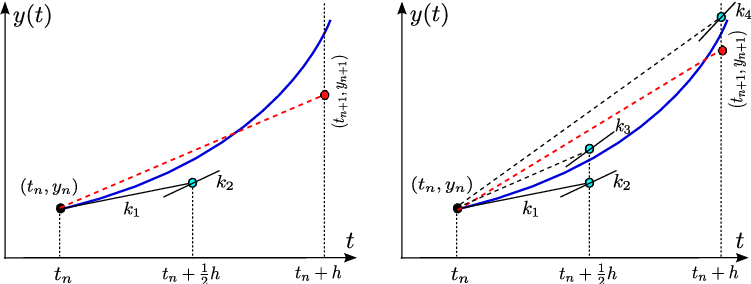

El método de cuarto orden de Runge-Kutta es altamente preciso y se utiliza comúnmente en aplicaciones donde se requiere una alta precisión en la solución de EDO.



En la definición anterior, definimos los diferentes parámetros del modelo y vimos que $\delta$ nos dice algo sobre qué tan eficientes son los depredadores cazando. Entonces podemos disminuir este valor y hacerlos menos eficientes. Cambiamos $\delta$ a 0.025 del valor original de 0.075.

- ¿Qué creen que pase con las poblaciones?

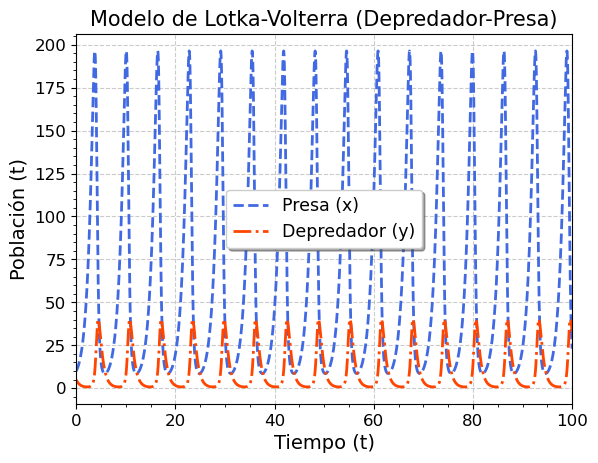

In [102]:
# Parámetros del modelo
alpha = 1.0
beta = 0.1
gamma = 1.5
delta = 0.025

# Condiciones iniciales y configuración del tiempo
y0 = np.array([10, 5])  # Poblaciones iniciales de presa y depredador
t = np.arange(0, 100, 0.01)  # Vector de tiempo
h = 0.01  # Tamaño del paso de integración

# Integración numérica utilizando RK4
solution = [y0]
for i in range(len(t) - 1):
    y_next = runge_kutta4(t[i], solution[-1], h, alpha, beta, gamma, delta)
    solution.append(y_next)
solution = np.array(solution)

# Visualización de la solución
plt.plot(t, solution[:,0], label='Presa (x)',c='royalblue',linewidth=2,linestyle='--')
plt.plot(t, solution[:,1], label='Depredador (y)',c='orangered',linewidth=2,linestyle='-.')
grafico_linea_ts(0,100.01,'Tiempo (t)','Población (t)','Modelo de Lotka-Volterra (Depredador-Presa)',legend=True)


---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 13 - El modelo Lotka-Volterra </font>**

<font color="DarkBlue"> 1. Modifique el modelo de Lotka Volterra para hacer que las presas mueran todas en algún punto del tiempo a través de modificar los parámetros. Justifique su elección de parámetros adecuadamente (con texto).  

<font color="DarkBlue"> 2. Ahora modifique el modelo hasta hacer que las poblaciones máximas de presas y depredadores sean más o menos iguales. De nuevo, justifique su elección de parámetros. Explique bio-físicamente qué está sucediendo.

---

#### **<font color="ForestGreen"> Diagrama de fase (plano fase) Presa-Depredador: </font>**

- Este diagrama muestra las poblaciones de presas y depredadores en un sistema de coordenadas. La población de presas generalmente se coloca en el eje horizontal (eje x), mientras que la población de depredadores se coloca en el eje vertical (eje y). Con este diagrama, puedes visualizar cómo cambian las poblaciones a lo largo del tiempo y cómo interactúan entre sí. Las trayectorias en el diagrama de fase pueden revelar comportamientos estables, ciclos límite, puntos de equilibrio, etc.

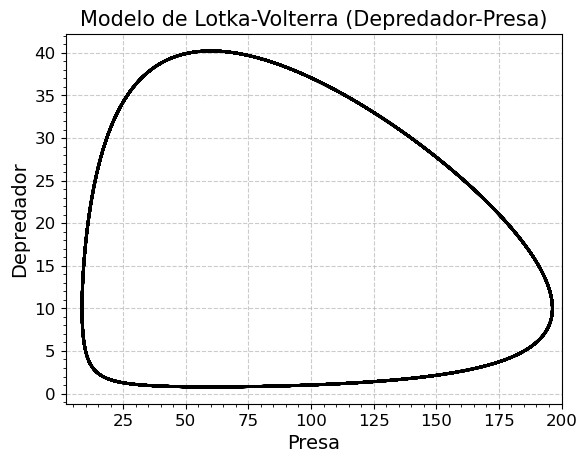

In [106]:
plt.plot(solution[:,0], solution[:,1],c='k',linewidth=2)
grafico_linea_ts(2,200.01,'Presa','Depredador','Modelo de Lotka-Volterra (Depredador-Presa)')


Ahora, si queremos resolver el modelo de Lotka-Volterra muchas veces pero sin variar mucho el código de cómo queremos hacer la solución. 

A este función le llamaremos `lv_solver` que será función de:

- `y_0`: vector de condiciones iniciales (presas,depredadores)
- parámetros del modelo:
    - $\alpha$: Tasa de crecimiento intrínseca de la población de presa en ausencia de depredadores. Es el crecimiento máximo de la población de presa cuando no hay depredadores.

    - $\beta$: Tasa de mortalidad de la presa debido a la depredación. Es la tasa a la que los depredadores matan a las presas.

    - $\gamma$: Tasa de disminución de la población de depredadores en ausencia de presas. Es la tasa de decrecimiento de la población del depredador cuando no hay presas disponibles.

    - $\delta$: Eficiencia en la conversión de presas en nuevos depredadores. Representa la eficacia con la que los depredadores convierten las presas en nuevos depredadores. O la eficacia con la que son cazadas las presas.


In [19]:
def lv_solver(y0,alpha = 1.0,beta = 0.1,gamma = 1.5,delta = 0.025):
    t = np.arange(0, 100, 0.01)  # Vector de tiempo
    h = 0.01  # Tamaño del paso de integración

    # Integración numérica utilizando RK4
    solution = [y0]
    for i in range(len(t) - 1):
        y_next = runge_kutta4(t[i], solution[-1], h, alpha, beta, gamma, delta)
        solution.append(y_next)
    solution = np.array(solution)
    return solution

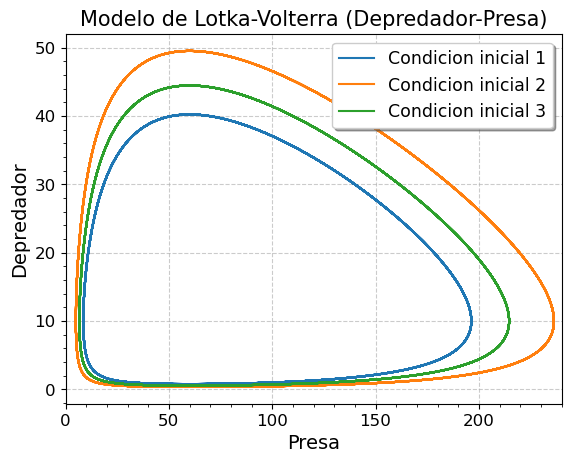

In [108]:
# Condiciones iniciales 
# 1 presas=10, depredadores = 5
# 2 presas=5, depredadores = 10
# 3 presas=7, depredadores = 7
y0s = np.array([[10, 5],[5,10],[7,7]])
for iy,y0 in enumerate(y0s):
    solution=lv_solver(y0)
    plt.plot(solution[:,0], solution[:,1], label='Condicion inicial '+str(iy+1))
grafico_linea_ts(0,240.01,'Presa','Depredador','Modelo de Lotka-Volterra (Depredador-Presa)',legend=True)


La forma de este diagrama de fase está dada principalmente por los parámetros del modelo. Las condiciones iniciales nos dicen algo sobre cómo evolucionan las diferentes poblaciones alrededor del mismo estado de equilibrio. 

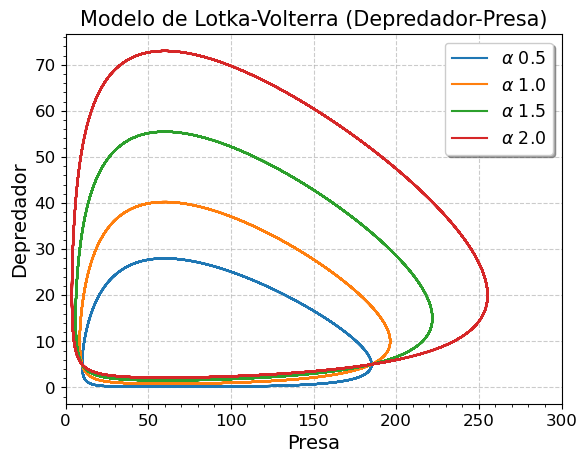

In [109]:
# Condiciones iniciales 
y0 = np.array([10,5])
alphas= np.arange(0.5,2.1,0.5)
for iy,alpha in enumerate(alphas):
    solution=lv_solver(y0,alpha=alpha)
    plt.plot(solution[:,0], solution[:,1], label=r'$ \alpha $ '+str(alpha))
grafico_linea_ts(0,300.01,'Presa','Depredador','Modelo de Lotka-Volterra (Depredador-Presa)',legend=True)



####  **<font color="ForestGreen"> Diagramas de contorno o de campo de vectores: </font>**
 Estos diagramas utilizan flechas para representar la dirección y la magnitud de los cambios en las poblaciones de presas y depredadores en diferentes regiones del plano de fase. Pueden ayudar a visualizar cómo las poblaciones evolucionan en función de sus valores actuales.
 
 Aquí graficamos: 
 
     
\begin{align}
\alpha x−\beta\,xy
\end{align}

y 

\begin{align}
−\gamma y+\delta xy
\end{align}

Para todas las x y y posibles. Esto se debe a que son estas 2 ecuaciones las que dominan y rigen el sistema. Es decir, el sistema de ecuaciones de Lotka-Volterra depende fundamentalmente de sus 4 parámetros y en segundo lugar, pero casi igualmente importante, de las condiciones iniciales. 

En el siguiente diagrama, vemos muchas flechas cuya dirección nos dice hacia donde se irán las poblaciones en el siguiente instante de tiempo.
Las flechas nos dicen en 1 sólo instante temporal para estas condiciones del modelo qué es lo que sucederá.

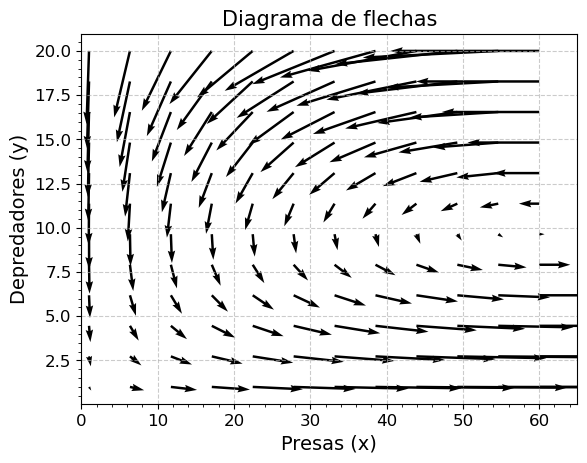

In [110]:
X, Y = np.meshgrid(np.linspace(1, 60, 12), np.linspace(1, 20, 12))
alpha=1
U = alpha*X - beta*X*Y
V = -gamma*Y + delta*X*Y
plt.quiver(X, Y, U, V, scale=200)
grafico_linea_ts(0,65.01,'Presas (x)','Depredadores (y)','Diagrama de flechas')


---
<a name='ej-1'></a>
#### **<font color="DodgerBlue">Ejercicio 14 - El modelo Lotka-Volterra 2 </font>**

<font color="DarkBlue"> 1. De las solución original de clase, modifique el parámetro $\gamma$ a un valor sensato pero diferente del original. Escriba una hipótesis de lo que sucederá con el modelo. 

<font color="DarkBlue"> 2. Grafique las series de tiempo de sus resultados. 

<font color="DarkBlue"> 3. Haga el diagrama de fase de su experimento y compárelo con el experimento original (Control). 
    
    
---